# Imports

In [ ]:
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.stats as stats1

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Loading dataset

In [ ]:

df_train_personal = pd.read_csv("personal_train.csv")
df_train_other = pd.read_csv("other_train.csv")

In [ ]:
df_train_personal.head(5)

Unnamed: 0             name  ...      sex  date_of_birth
0           0  Roscoe Bohannon  ...     Male     01/12/1960
1           1     Ernest Kline  ...   Female     1968-02-02
2           2  Harold Hendriks  ...   Female       58-11-24
3           3   Randy Baptiste  ...     Male     04/04/1974
4           4  Anthony Colucci  ...     Male     1948-12-01

[5 rows x 6 columns]

In [ ]:
df_train_other.head(5)

Unnamed: 0             name  ... capital-loss  workclass
0           0   Michael Henson  ...       1672.0    Private
1           1    Roger Navarro  ...          0.0    Private
2           2    Donald Torres  ...          0.0    Private
3           3  William Speegle  ...          0.0    Private
4           4      Daryl Rager  ...          0.0    Private

[5 rows x 22 columns]

#Basic statistical data

###Personal data

In [ ]:
#Number of columns:
len(df_train_personal.columns)

6

In [ ]:
df_train_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3933 non-null   int64 
 1   name           3933 non-null   object
 2   address        3933 non-null   object
 3   age            3933 non-null   int64 
 4   sex            3933 non-null   object
 5   date_of_birth  3933 non-null   object
dtypes: int64(2), object(4)
memory usage: 184.5+ KB


In [ ]:
df_train_personal.describe()

Unnamed: 0          age
count  3933.000000  3933.000000
mean   1966.000000    51.816934
std    1135.503633    11.814803
min       0.000000    -1.000000
25%     983.000000    44.000000
50%    1966.000000    52.000000
75%    2949.000000    60.000000
max    3932.000000   113.000000

In [ ]:
df_train_personal.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [ ]:
df_train_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3933 non-null   object
 1   address        3933 non-null   object
 2   age            3933 non-null   int64 
 3   sex            3933 non-null   object
 4   date_of_birth  3933 non-null   object
dtypes: int64(1), object(4)
memory usage: 153.8+ KB


In [ ]:
#Number of records in dataset with personal data
len(df_train_personal)

3933

####Dataset has 3933 records and 6 columns including "the index column". It consists of basic personal info as name, address, age(depends on date_of_birth), sex and date_of_birth. Only 'age' has integer format, others are objects.

###Health state

In [ ]:
#Number of columns:
len(df_train_other.columns) 

22

In [ ]:
df_train_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3983 non-null   int64  
 1   name              3983 non-null   object 
 2   address           3983 non-null   object 
 3   kurtosis_oxygen   3972 non-null   float64
 4   occupation        3968 non-null   object 
 5   pregnant          3969 non-null   object 
 6   education-num     3974 non-null   float64
 7   skewness_glucose  3972 non-null   float64
 8   mean_glucose      3362 non-null   object 
 9   std_oxygen        3964 non-null   float64
 10  capital-gain      3970 non-null   float64
 11  skewness_oxygen   3966 non-null   float64
 12  kurtosis_glucose  3969 non-null   float64
 13  personal_info     3967 non-null   object 
 14  fnlwgt            3970 non-null   float64
 15  class             3964 non-null   float64
 16  std_glucose       3972 non-null   float64


In [ ]:
df_train_other.describe()

Unnamed: 0  kurtosis_oxygen  ...  hours-per-week  capital-loss
count  3983.00000      3972.000000  ...     3965.000000   3975.000000
mean   1991.00000         7.418624  ...       40.694578     87.786164
std    1149.93739         4.806701  ...       11.980508    406.718773
min       0.00000        -2.597872  ...        1.000000      0.000000
25%     995.50000         3.660017  ...       40.000000      0.000000
50%    1991.00000         7.787156  ...       40.000000      0.000000
75%    2986.50000        10.269058  ...       45.000000      0.000000
max    3982.00000        34.539844  ...       99.000000   4356.000000

[8 rows x 14 columns]

In [ ]:
#There are some inappropriate data
df_train_other['mean_glucose'].describe()

count     3362
unique    2799
top         ??
freq       111
Name: mean_glucose, dtype: object

In [ ]:
df_train_other.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [ ]:
df_train_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   kurtosis_oxygen   3972 non-null   float64
 3   occupation        3968 non-null   object 
 4   pregnant          3969 non-null   object 
 5   education-num     3974 non-null   float64
 6   skewness_glucose  3972 non-null   float64
 7   mean_glucose      3362 non-null   object 
 8   std_oxygen        3964 non-null   float64
 9   capital-gain      3970 non-null   float64
 10  skewness_oxygen   3966 non-null   float64
 11  kurtosis_glucose  3969 non-null   float64
 12  personal_info     3967 non-null   object 
 13  fnlwgt            3970 non-null   float64
 14  class             3964 non-null   float64
 15  std_glucose       3972 non-null   float64
 16  income            3972 non-null   object 


In [ ]:
#Number of records in dataset with health data
len(df_train_other)

3983

####Another dataset consists of 3983 records and 21 columns. It contains the information about additional details of people, their health and measurments. 

####As we can see the amounts of records in the datasets are different. That means either one of the datasets has duplicates or doesn't have records of some "clients".

In [ ]:
#Amount of records doesn't match in two datasets
difference1=df_train_other[df_train_other["name"].isin(df_train_personal["name"]) == False]
difference1

Empty DataFrame
Columns: [name, address, kurtosis_oxygen, occupation, pregnant, education-num, skewness_glucose, mean_glucose, std_oxygen, capital-gain, skewness_oxygen, kurtosis_glucose, personal_info, fnlwgt, class, std_glucose, income, mean_oxygen, hours-per-week, capital-loss, workclass]
Index: []

In [ ]:
difference2=df_train_personal[df_train_personal["name"].isin(df_train_other["name"]) == False]
difference2

Empty DataFrame
Columns: [name, address, age, sex, date_of_birth]
Index: []

In [ ]:
#We found a column by which we can find out why there is a difference in number of records in two datasets
print("Not null names in \"Personal data\": ", df_train_personal.name.isnull().sum())
print("Not null names in \"Healthy data\": ",df_train_other.name.isnull().sum())

Not null names in "Personal data":  0
Not null names in "Healthy data":  0


####The results show that all the names are present in both datasets.

####That is why we can now try to check if there are any duplicates

In [ ]:
#The problem which cause the difference is not unique records:
print("Difference in \"Personal data\": ", len(df_train_personal.name)-len(df_train_personal.name.unique()))
print("Difference in \"Healthy data\": ", len(df_train_other.name)-len(df_train_other.name.unique()))

Difference in "Personal data":  0
Difference in "Healthy data":  50


####As it is shown there are 50 not unique names in the healthy dataset. That is one of the problems we will have to solve in the next faze. Further you can see what records are not unique.

In [ ]:
non_unique=(df_train_other['name'].value_counts()).to_dict()
non_unique_2=[]
for key in non_unique:
  if(non_unique[key]>1):
    non_unique_2+=[key]
non_unique_2  
non_unique_2= pd.DataFrame (non_unique_2,columns=['name'])
df_train_other[df_train_other["name"].isin(non_unique_2["name"])].sort_values("name")


name  ...   workclass
2261     Andrew Davis  ...     Private
2710     Andrew Davis  ...     Private
441     Andrew Vandre  ...     Private
618     Andrew Vandre  ...     Private
166         Bob Smith  ...   Local-gov
...               ...  ...         ...
1767  William Bostian  ...     Private
2754   William Chicas  ...   Local-gov
3871   William Chicas  ...   Local-gov
875      William Hope  ...         NaN
37       William Hope  ...     Private

[100 rows x 21 columns]

In [ ]:
df_train =pd.merge(df_train_personal, df_train_other, on=["name", "address"])
df_train[df_train["name"].isin(non_unique_2["name"])].sort_values("name")

name  ...   workclass
2347     Andrew Davis  ...     Private
2348     Andrew Davis  ...     Private
1917    Andrew Vandre  ...     Private
1916    Andrew Vandre  ...     Private
3063        Bob Smith  ...   Local-gov
...               ...  ...         ...
1163  William Bostian  ...     Private
1701   William Chicas  ...   Local-gov
1700   William Chicas  ...   Local-gov
1958     William Hope  ...     Private
1959     William Hope  ...         NaN

[100 rows x 24 columns]

####So the problem is that some of the records are "duplicates", but not all data in them. The records with the same name values have different other column values, usualy one of them has a value in a column and the other doesn't. So we will have to merge two records into one, so that we get a full info about the client.

#Data analysis in pairs

###**Analise by oxygen**

####Let's see the relationships between oxygen metrics with class value as well.

In [ ]:
df_by_ox = df_train[['class', 'skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']]
df_by_ox.describe()

class  skewness_oxygen  mean_oxygen  kurtosis_oxygen   std_oxygen
count  3964.000000      3966.000000  3967.000000      3972.000000  3964.000000
mean      0.254793        91.275797    18.488222         7.418624    31.176411
std       0.435800       108.443728    34.781394         4.806701    22.283538
min       0.000000        -1.976976     0.213211        -2.597872     7.370432
25%       0.000000        12.858504     2.065635         3.660017    15.053053
50%       0.000000        68.476815     3.237458         7.787156    20.564154
75%       1.000000       127.078253    12.656773        10.269058    43.297645
max       1.000000      1191.000837   217.371238        34.539844   110.642211

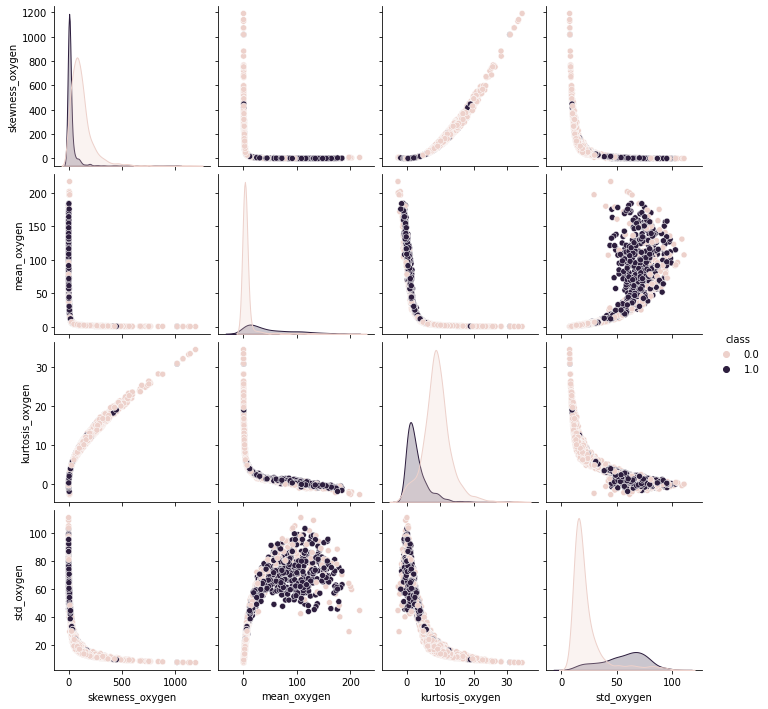

In [ ]:
sns.pairplot(df_by_ox, hue="class")

###Analise by oxygen using std metric

####In the begining we need to know the distribution of std_oxygen.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


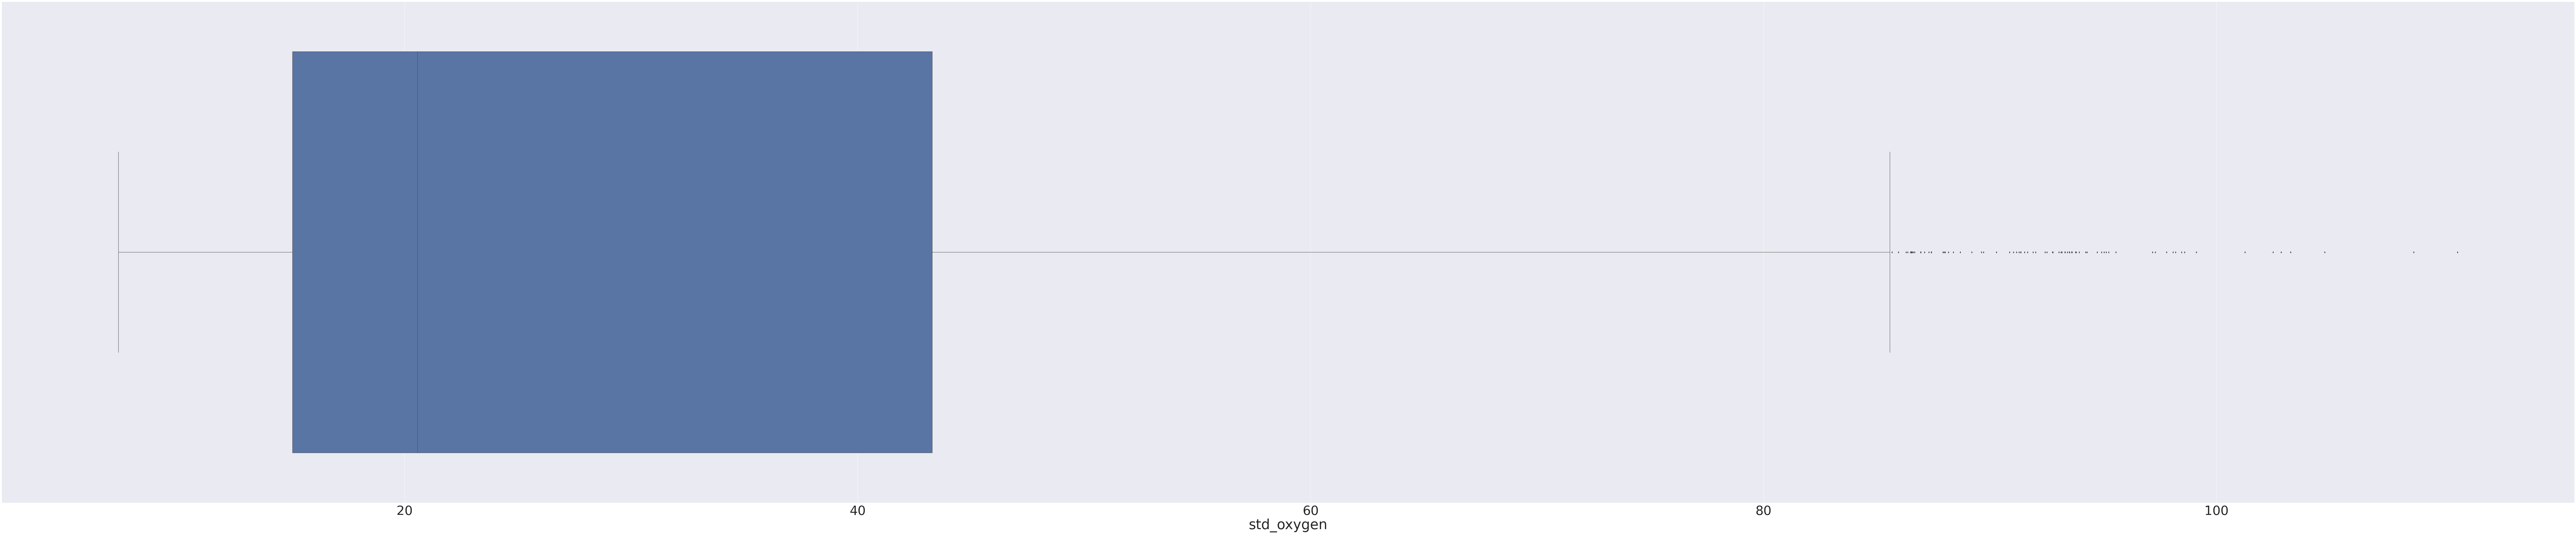

In [ ]:
sns.set(font_scale=5) 
plt.rcParams["figure.figsize"] = (200,40)
box = sns.boxplot('std_oxygen', data=df_train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


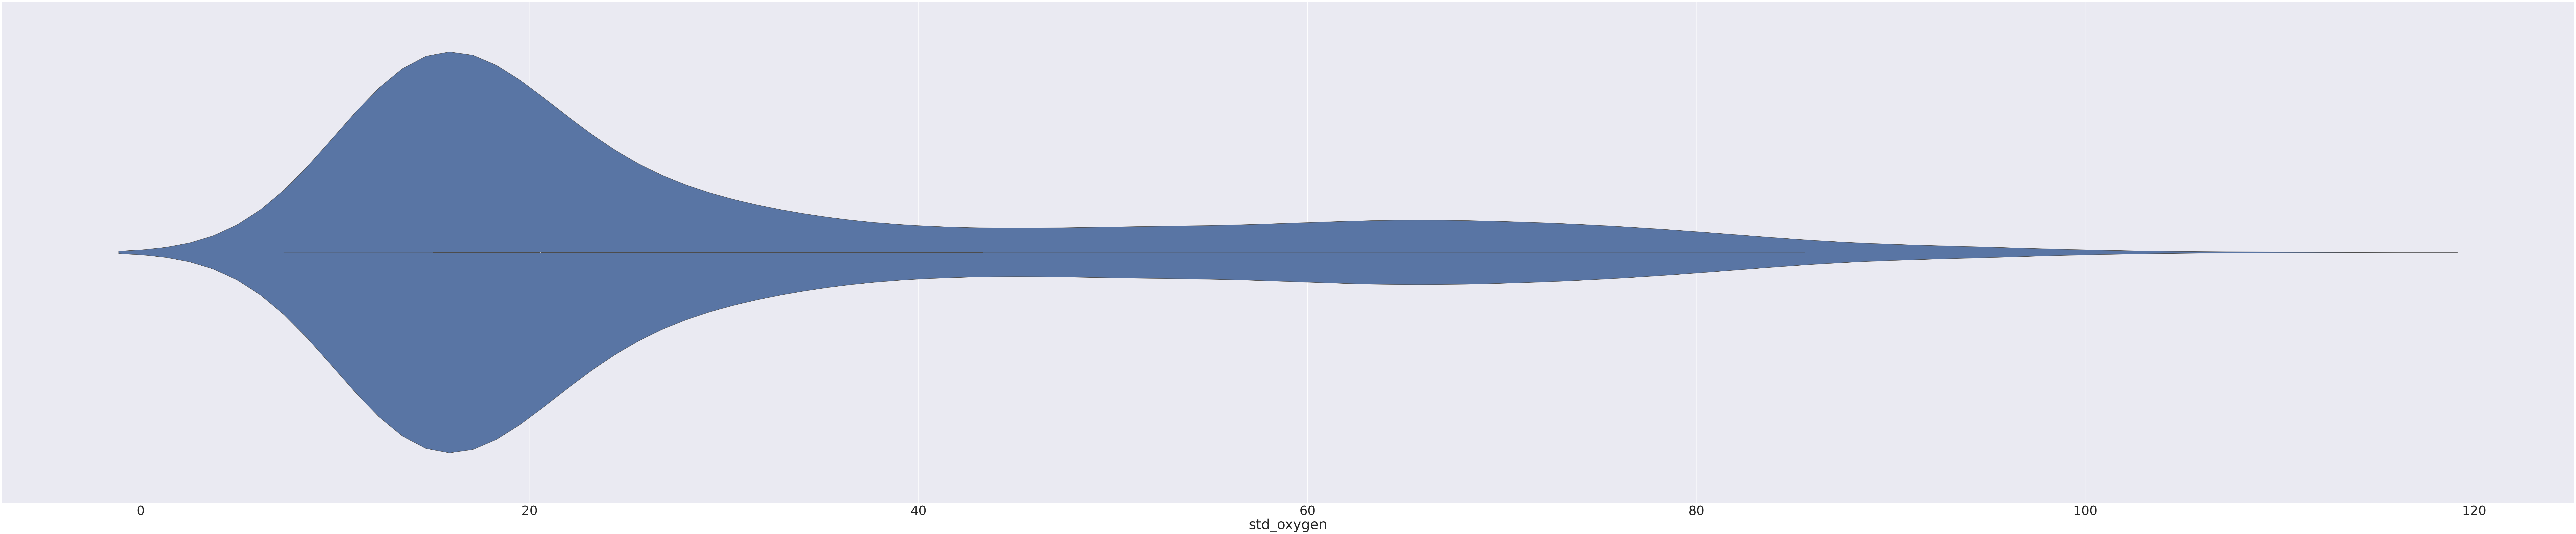

In [ ]:
ax = sns.violinplot('std_oxygen', data=df_train)

####For further observing we should normalize data about oxygen.

In [ ]:
def identify_outliers(a):

    med=a.quantile(0.75)-a.quantile(0.25)
    lower = a.quantile(0.25) - 1.5 * med
    upper = a.quantile(0.75) + 1.5 * med
    return a[(a > upper) | (a < lower)]


In [ ]:
df_normal_oxygen_std_1= df_train["std_oxygen"]
df_normal_oxygen_out =identify_outliers(df_normal_oxygen_std_1)
df_normal_oxygen_out

33      87.408584
92      93.803112
95      91.662247
97      93.515167
174     86.934263
          ...    
3849    88.383935
3884    91.898969
3947    95.039354
3957    86.557493
3976    86.555964
Name: std_oxygen, Length: 78, dtype: float64

In [ ]:
df_normal_oxygen = df_train.drop(df_normal_oxygen_out.index)
df_normal_oxygen

name  ...   workclass
0         Roscoe Bohannon  ...   Local-gov
1            Ernest Kline  ...     Private
2         Harold Hendriks  ...     Private
3          Randy Baptiste  ...     Private
4         Anthony Colucci  ...     Private
...                   ...  ...         ...
3978      Clair Pinkleton  ...     Private
3979         William Pope  ...   State-gov
3980         Jared Kinsey  ...     Private
3981     Frederick Lawley  ...     Private
3982  Adalberto Daughters  ...     Private

[3905 rows x 24 columns]

####The diagram below shows the distribution of 'std_oxygen' after normalization.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


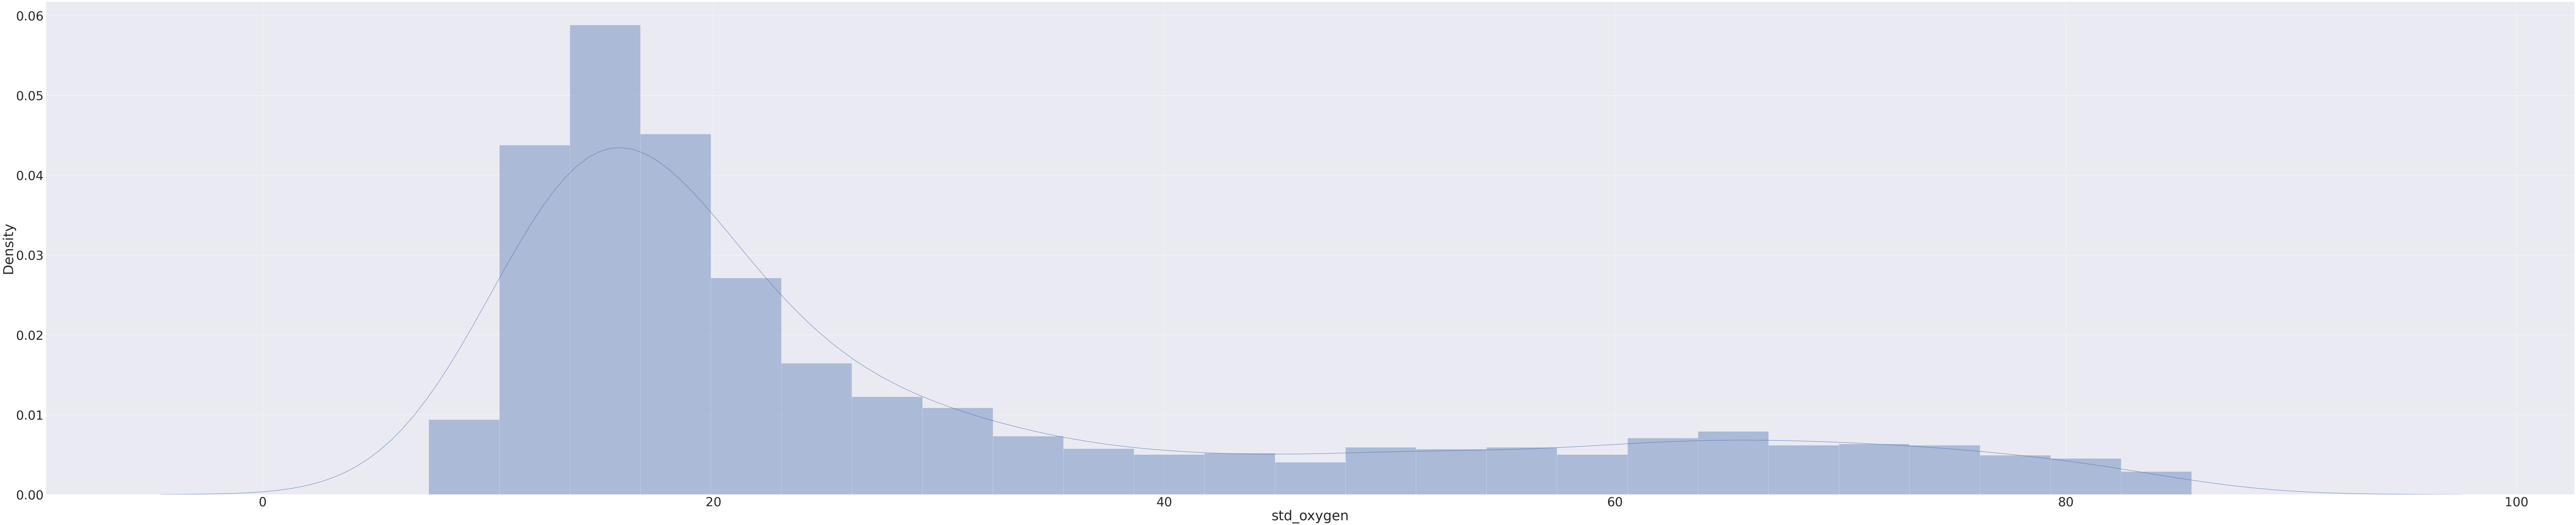

In [ ]:
df_normal_oxygen_std=df_normal_oxygen["std_oxygen"]
sns.distplot(df_normal_oxygen_std)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


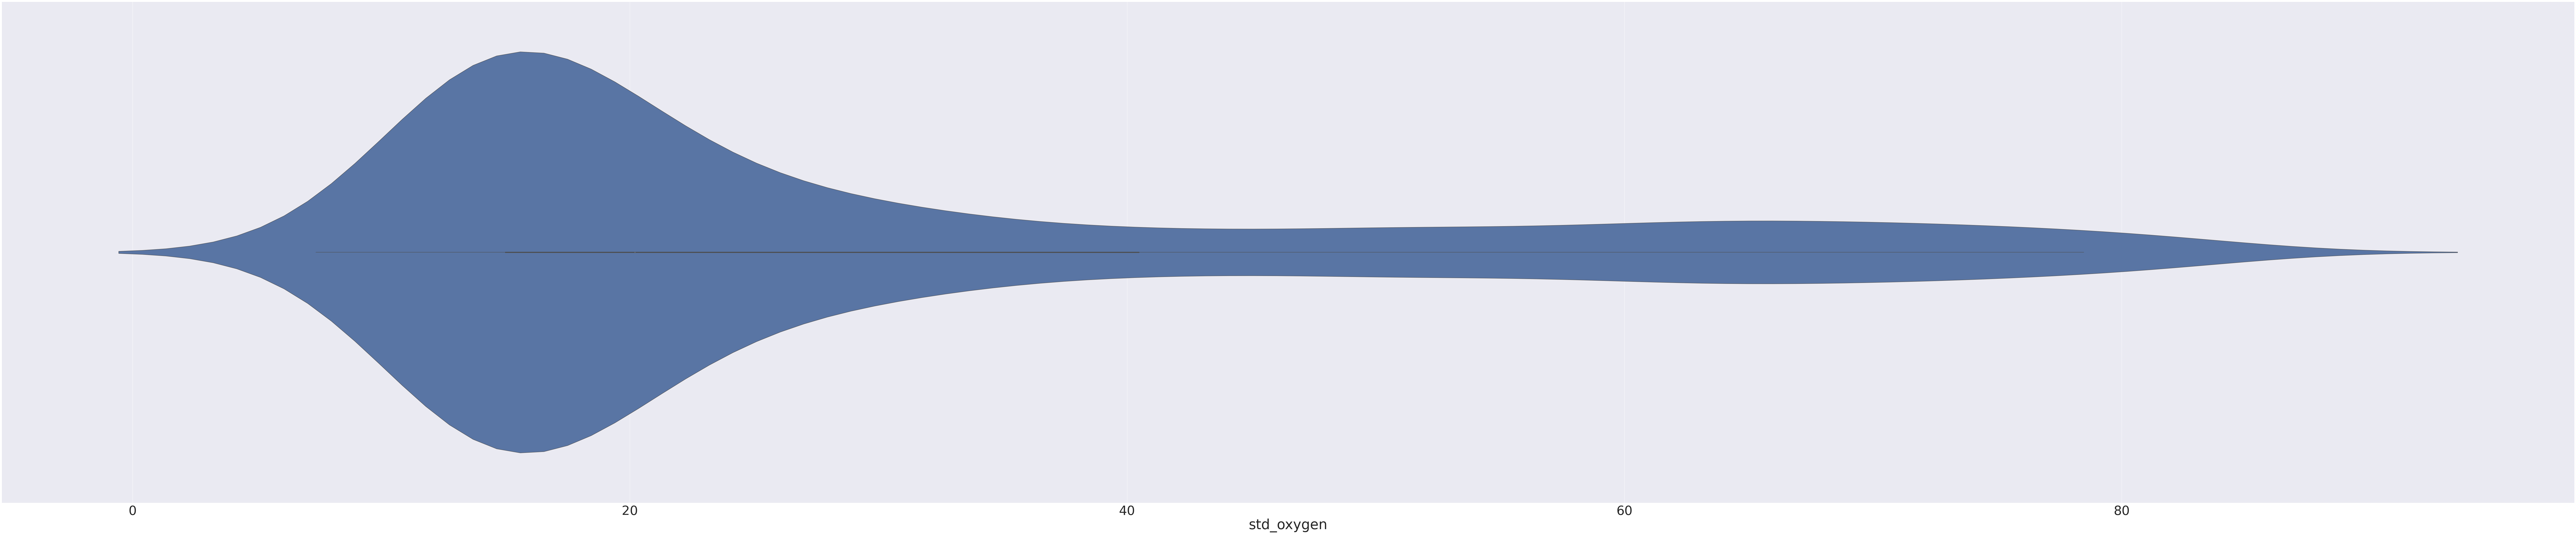

In [ ]:
ax = sns.violinplot('std_oxygen', data=df_normal_oxygen)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


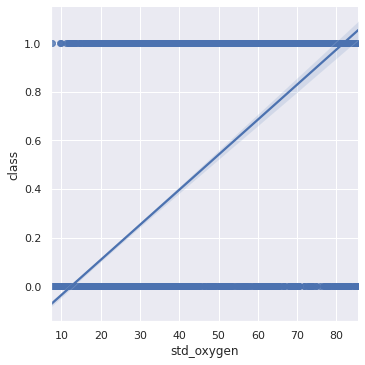

In [ ]:
sns.set(font_scale=1) 
sns.lmplot("std_oxygen", "class", df_normal_oxygen)

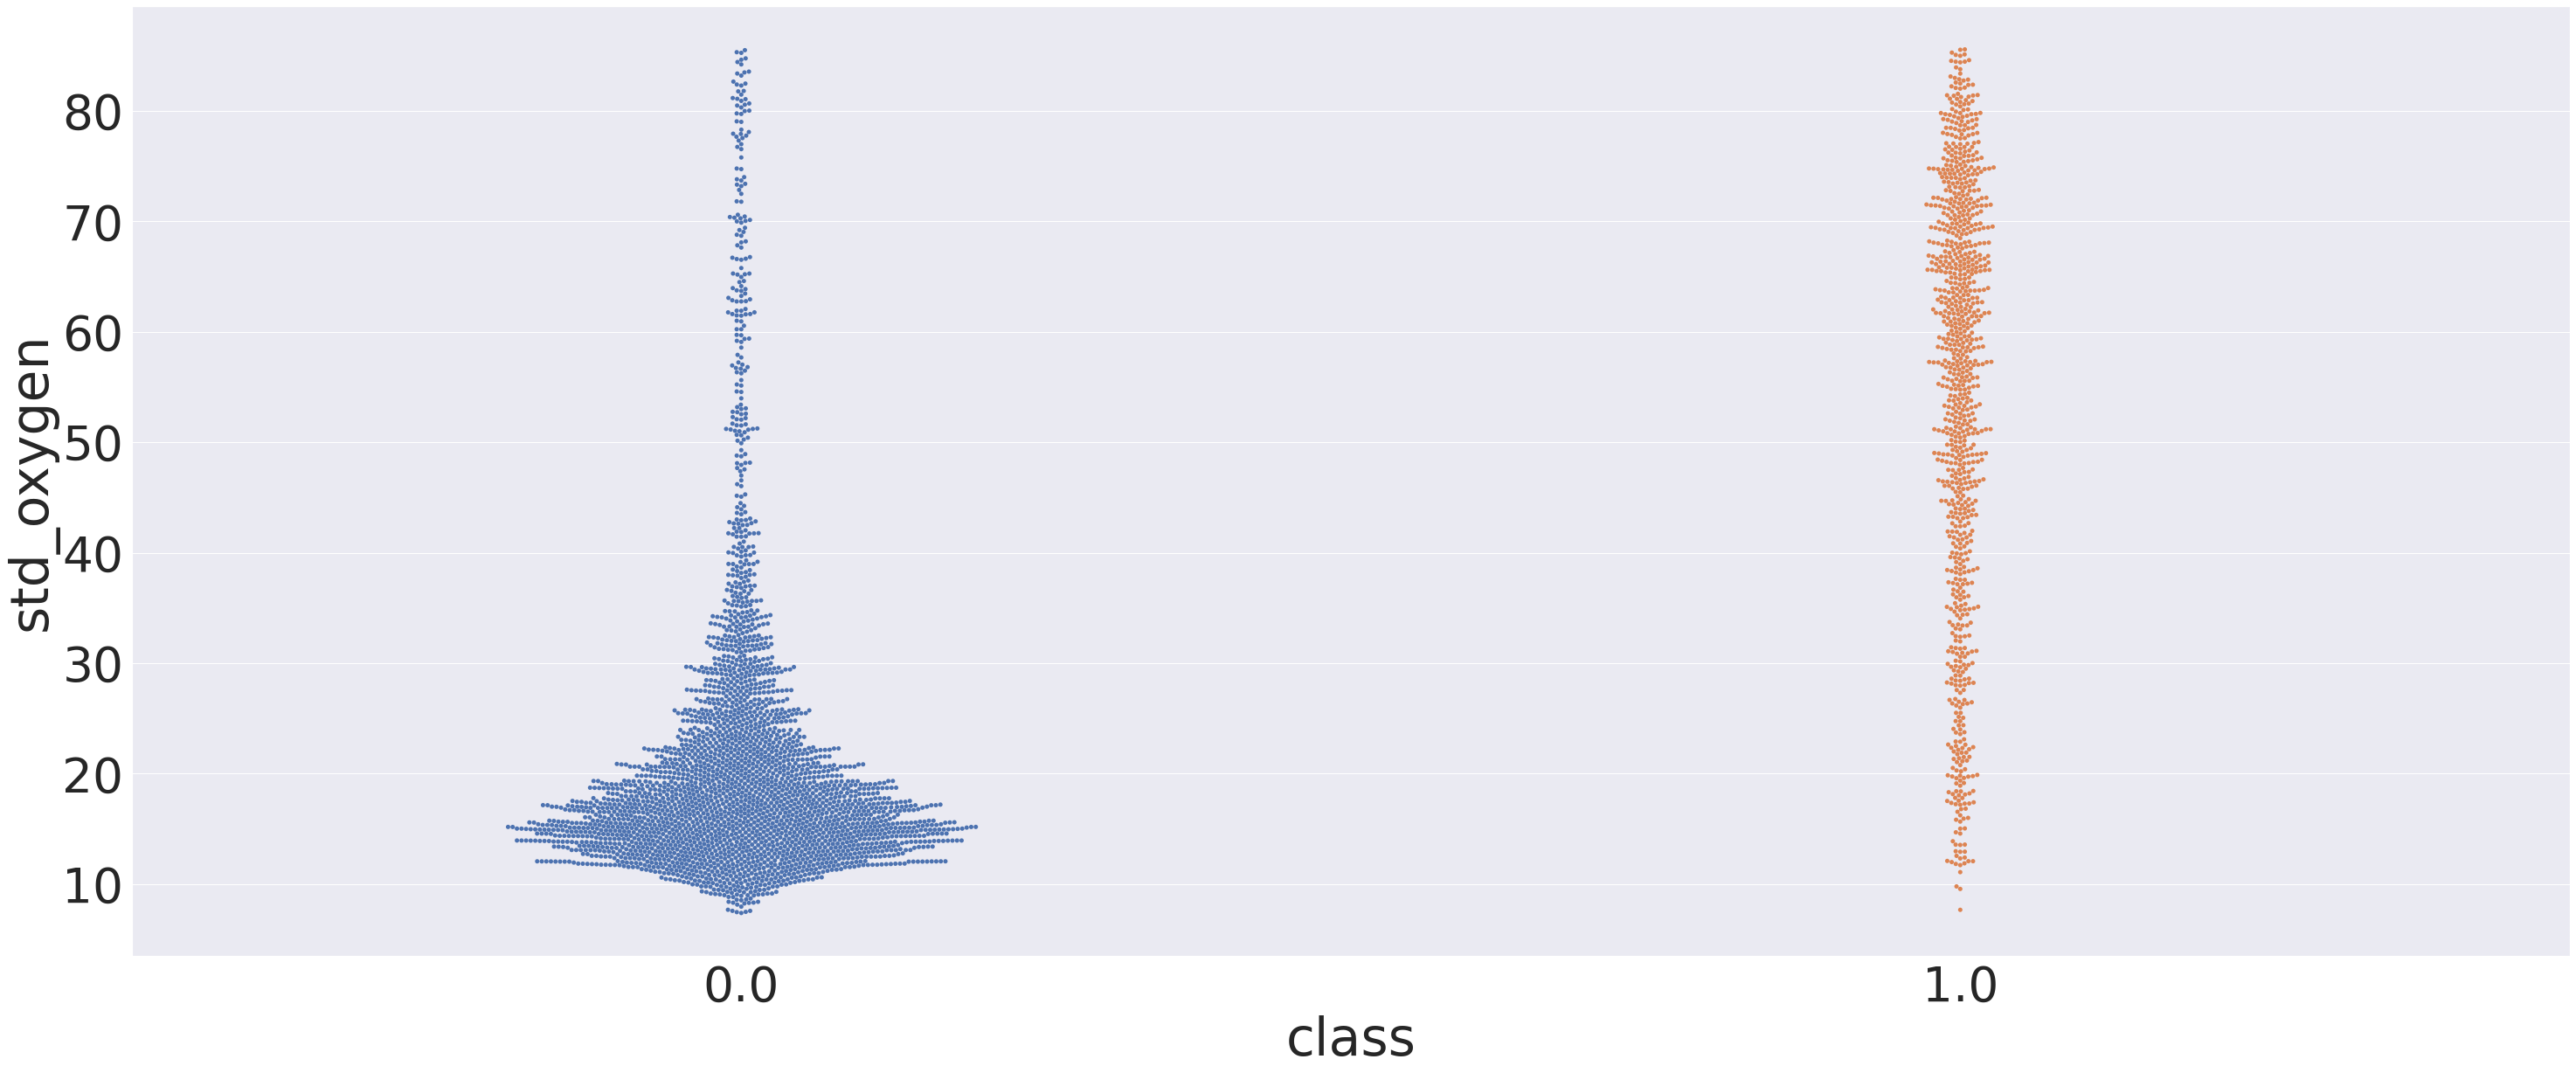

In [ ]:
plt.rcParams["figure.figsize"] = (50,20)
sns.set(font_scale=5) 
swarm = sns.swarmplot(x="class", y="std_oxygen", data=df_normal_oxygen)


####As it is shown the value of "std_oxygen" affects presence of the disease. At the plot we can see that the disease is absent mainly when the value of oxygen is within interval (0, 40).

In [ ]:
df_normal_oxygen_std=df_normal_oxygen["std_oxygen"]
df_normal_oxygen_std=df_normal_oxygen_std.dropna().reset_index(drop=True)
df_normal_oxygen_std

0       18.201225
1       13.631787
2       11.326035
3       19.256217
4       61.430430
          ...    
3881    53.782642
3882    70.394893
3883    16.980309
3884    13.059771
3885    13.565791
Name: std_oxygen, Length: 3886, dtype: float64

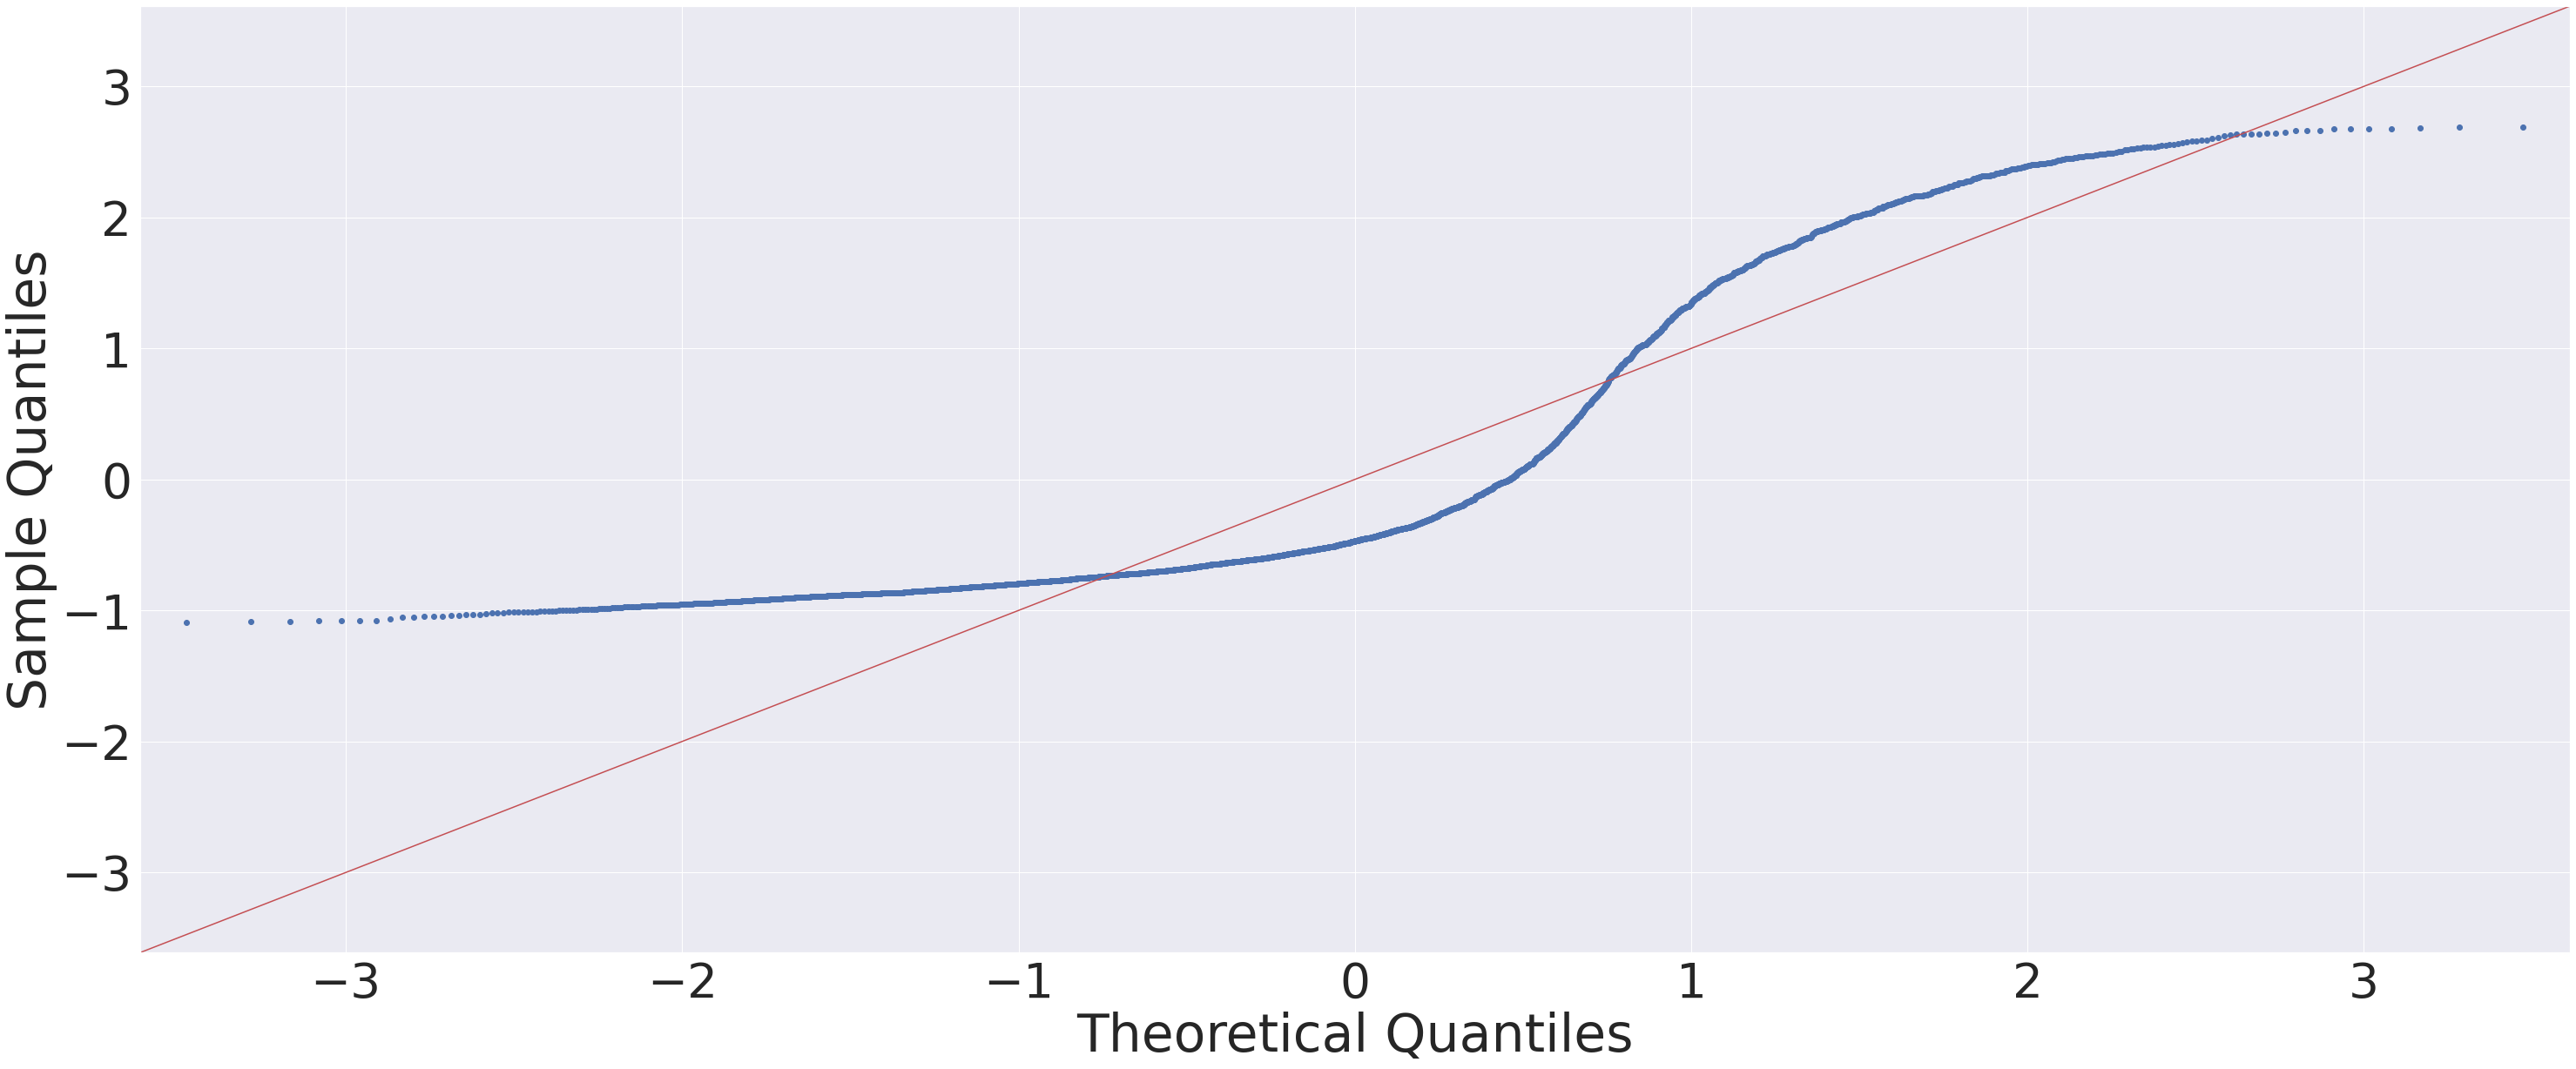

In [ ]:
_ = sm.ProbPlot(df_normal_oxygen_std, fit=True).qqplot(line='45')

####Our H0 is that std_oxygen doesn't affect class value. And alternative one (H1) is that it does affect presense of the disease.

In [ ]:
test_oxygen = df_normal_oxygen[["std_oxygen", "class"]].dropna().reset_index(drop=True)
test_oxygen[["std_oxygen", "class"]].corr()

std_oxygen     class
std_oxygen    1.000000  0.687372
class         0.687372  1.000000

In [ ]:
stats.shapiro(df_train[(df_train["class"]==0)].std_oxygen.dropna().reset_index(drop=True))

(0.6658635139465332, 0.0)

In [ ]:
stats.shapiro(df_train[(df_train["class"]==1)].std_oxygen.dropna().reset_index(drop=True))

(0.9727562069892883, 8.454291411906512e-13)

In [ ]:
stats.mannwhitneyu(df_train[(df_train["class"]==0)].std_oxygen, df_train[(df_train["class"]==1)].std_oxygen)

MannwhitneyuResult(statistic=316276.0, pvalue=4.5487302029077395e-307)

####As p-value is always less than 0.0001 we can dismiss H0 that std_oxygen doesn't affect presense of the diabetes and take alternative hypothesis as valid.

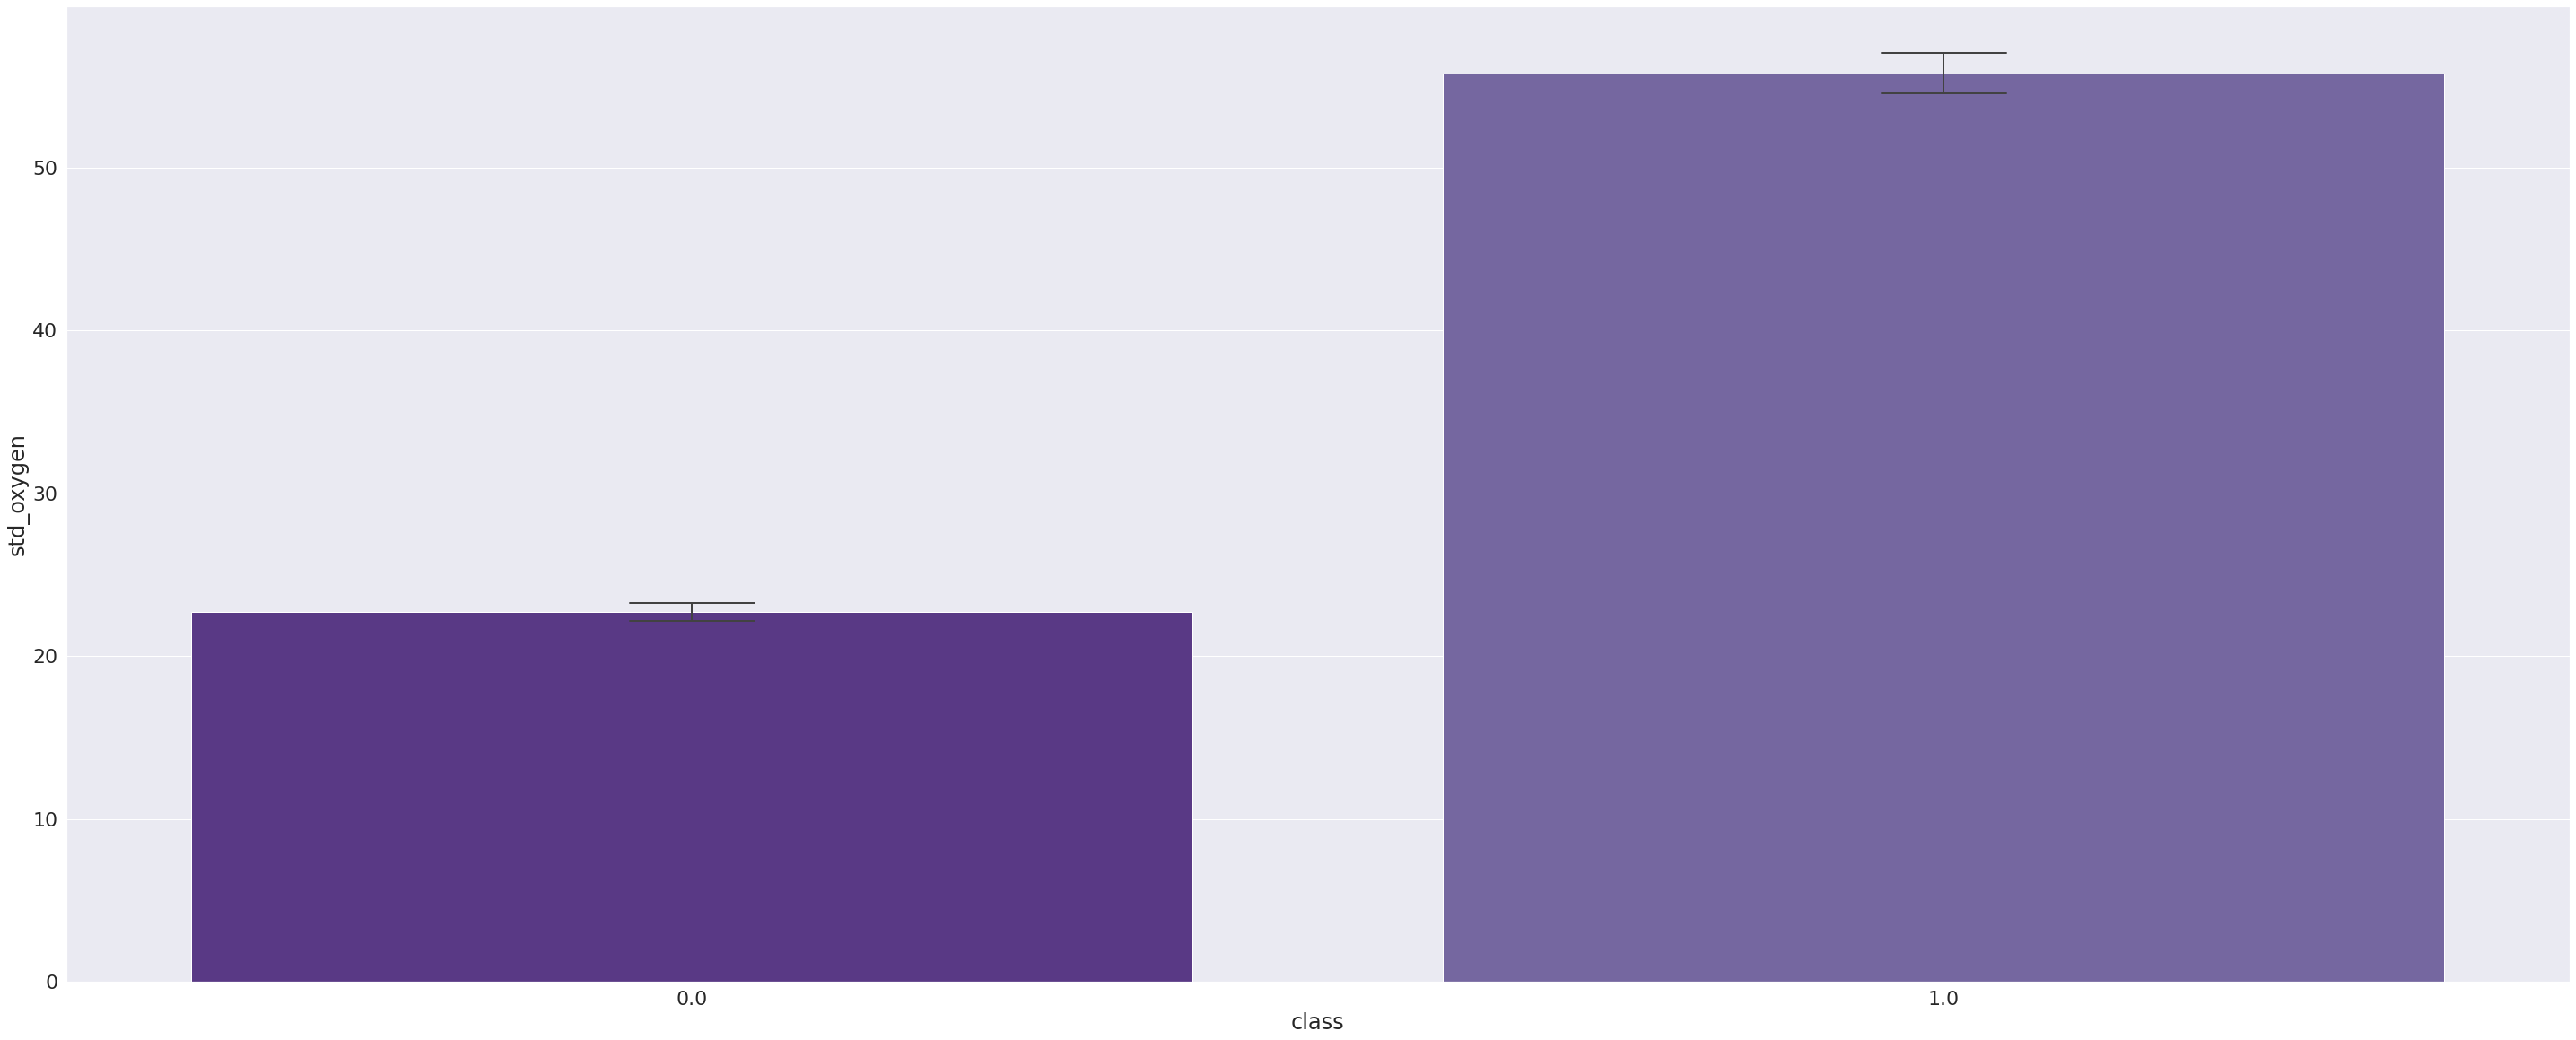

In [ ]:
sns.set(font_scale=2)
sns.barplot(x='class', y='std_oxygen', data=df_train,capsize=0.1, errwidth=2, palette=sns.color_palette("Purples_r"))

In [ ]:
sms.DescrStatsW(df_normal_oxygen_std).tconfint_mean()

(29.291690301108044, 30.593911947299578)

###**Analise by glucose**

####Firstly we want to see the relationships between the glucose metrics including class value (whether it has the disease or not).

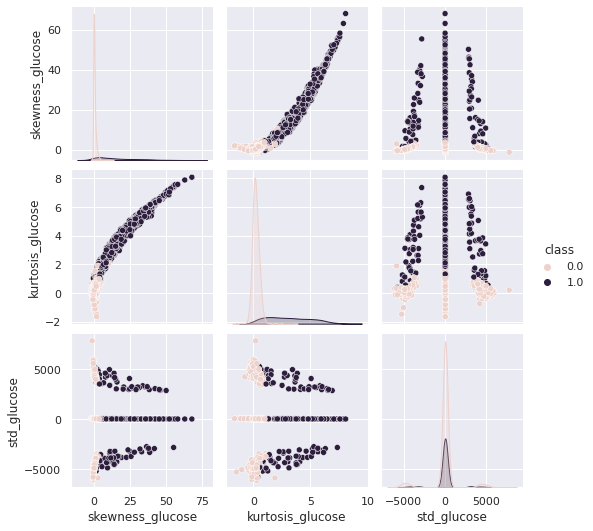

In [ ]:
sns.set(font_scale=1)
df_by_glu = df_train[['class','skewness_glucose', 'mean_glucose', 'kurtosis_glucose', 'std_glucose']]
sns.pairplot(df_by_glu, hue="class")


###Analise by glucose using std metric

####In this part we are going to check how much the presence of the diabetes depends on glucose in blood. We will consioder std_glucose. The thing we want to do first is to see what is the distribution of the std_glucose values in the given dataset.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


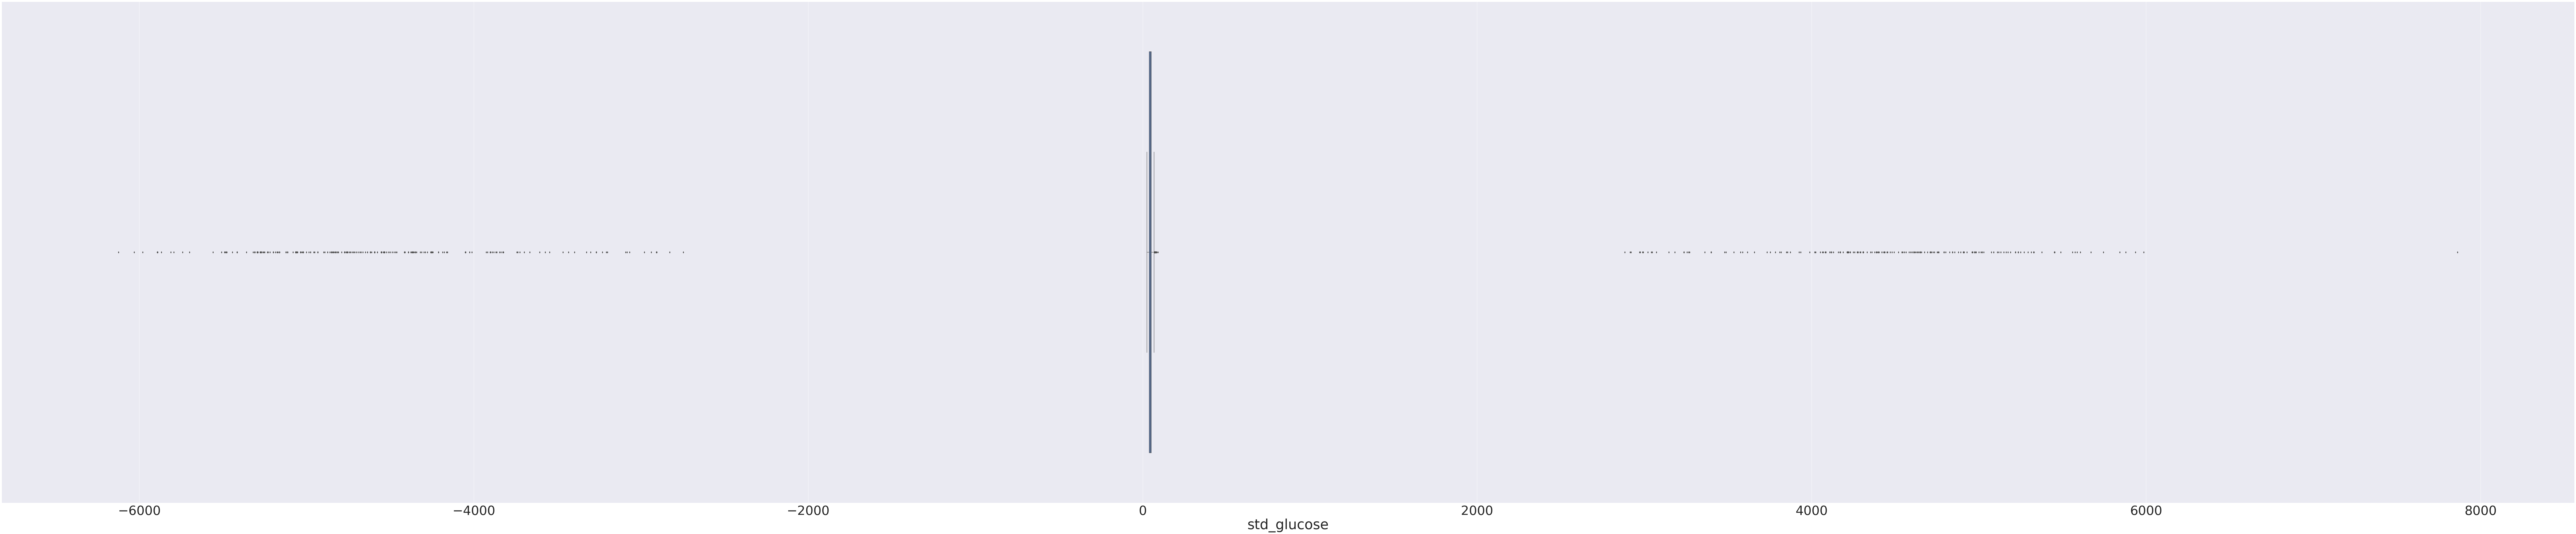

In [ ]:
sns.set(font_scale=5) 
plt.rcParams["figure.figsize"] = (200,40)
box = sns.boxplot('std_glucose', data=df_train)


####The box plot doesn't show much, so we can try a differnt one - violin plot.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


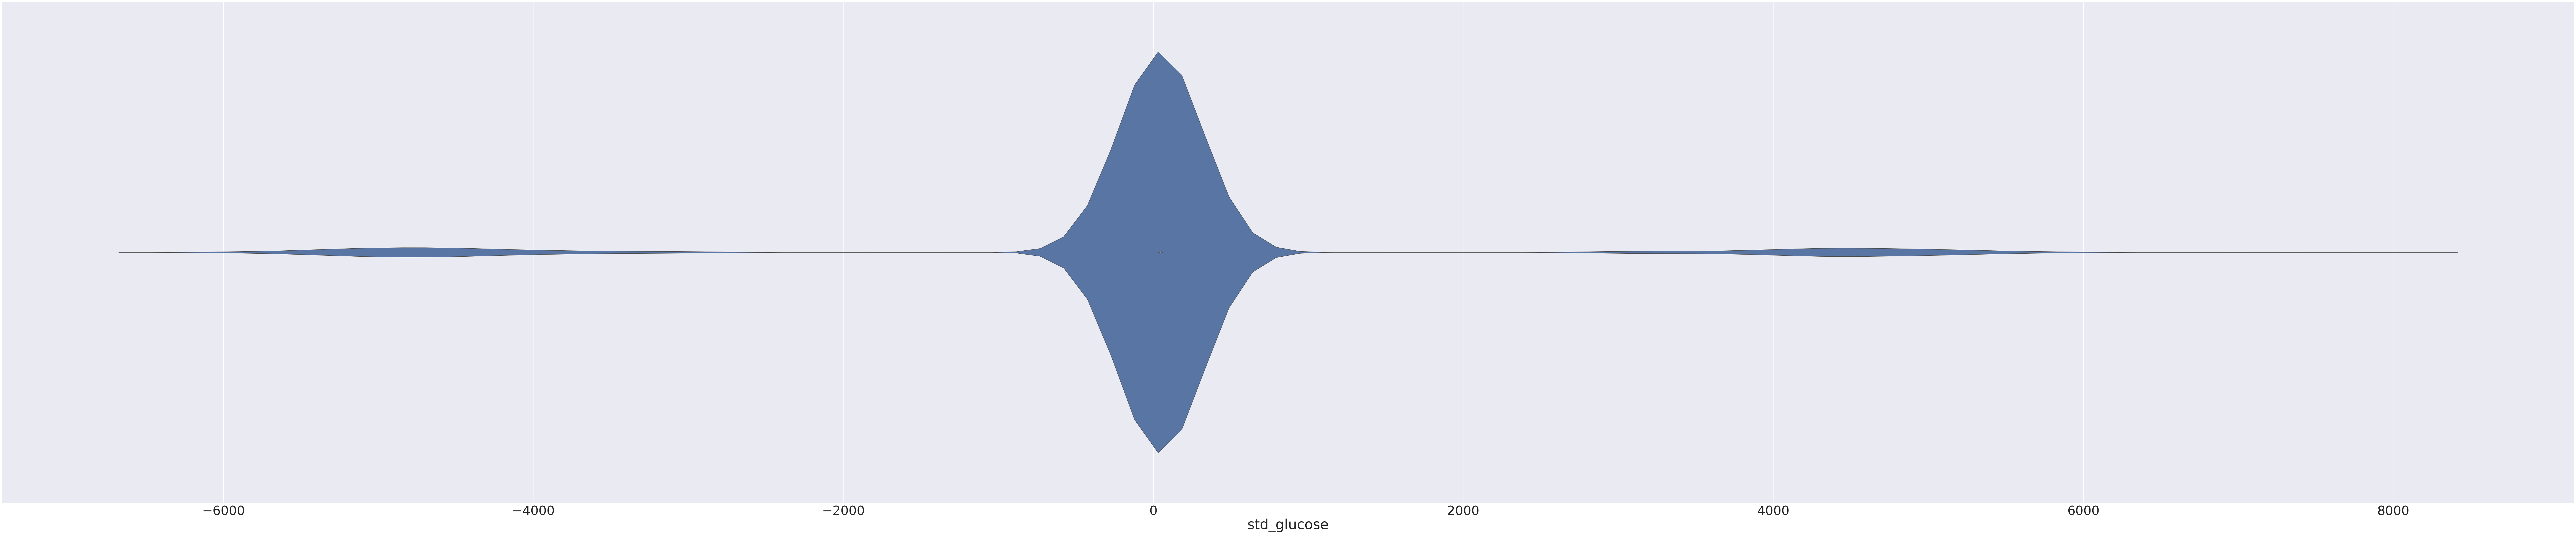

In [ ]:
plt.rcParams["figure.figsize"] = (200,40) 
sns.violinplot('std_glucose', data=df_train)


####Now we are going to normalize the data distribution.

In [ ]:
df_normal_glucose_std_1= df_train["std_glucose"]
df_normal_glucose_out =identify_outliers(df_normal_glucose_std_1)
df_normal_glucose_out

28     -4476.807571
33     -4770.361120
43     -5250.442690
44     -3826.172254
59     -4248.438865
           ...     
3937   -4575.923039
3952   -5792.687167
3960   -4890.385315
3962    5013.033550
3971    3534.714838
Name: std_glucose, Length: 412, dtype: float64

In [ ]:
df_normal_glucose = df_train.drop(df_normal_glucose_out.index)
df_normal_glucose

name  ...   workclass
0         Roscoe Bohannon  ...   Local-gov
1            Ernest Kline  ...     Private
2         Harold Hendriks  ...     Private
3          Randy Baptiste  ...     Private
4         Anthony Colucci  ...     Private
...                   ...  ...         ...
3978      Clair Pinkleton  ...     Private
3979         William Pope  ...   State-gov
3980         Jared Kinsey  ...     Private
3981     Frederick Lawley  ...     Private
3982  Adalberto Daughters  ...     Private

[3571 rows x 24 columns]

#### Now we can see what the distribution is like after normalization.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


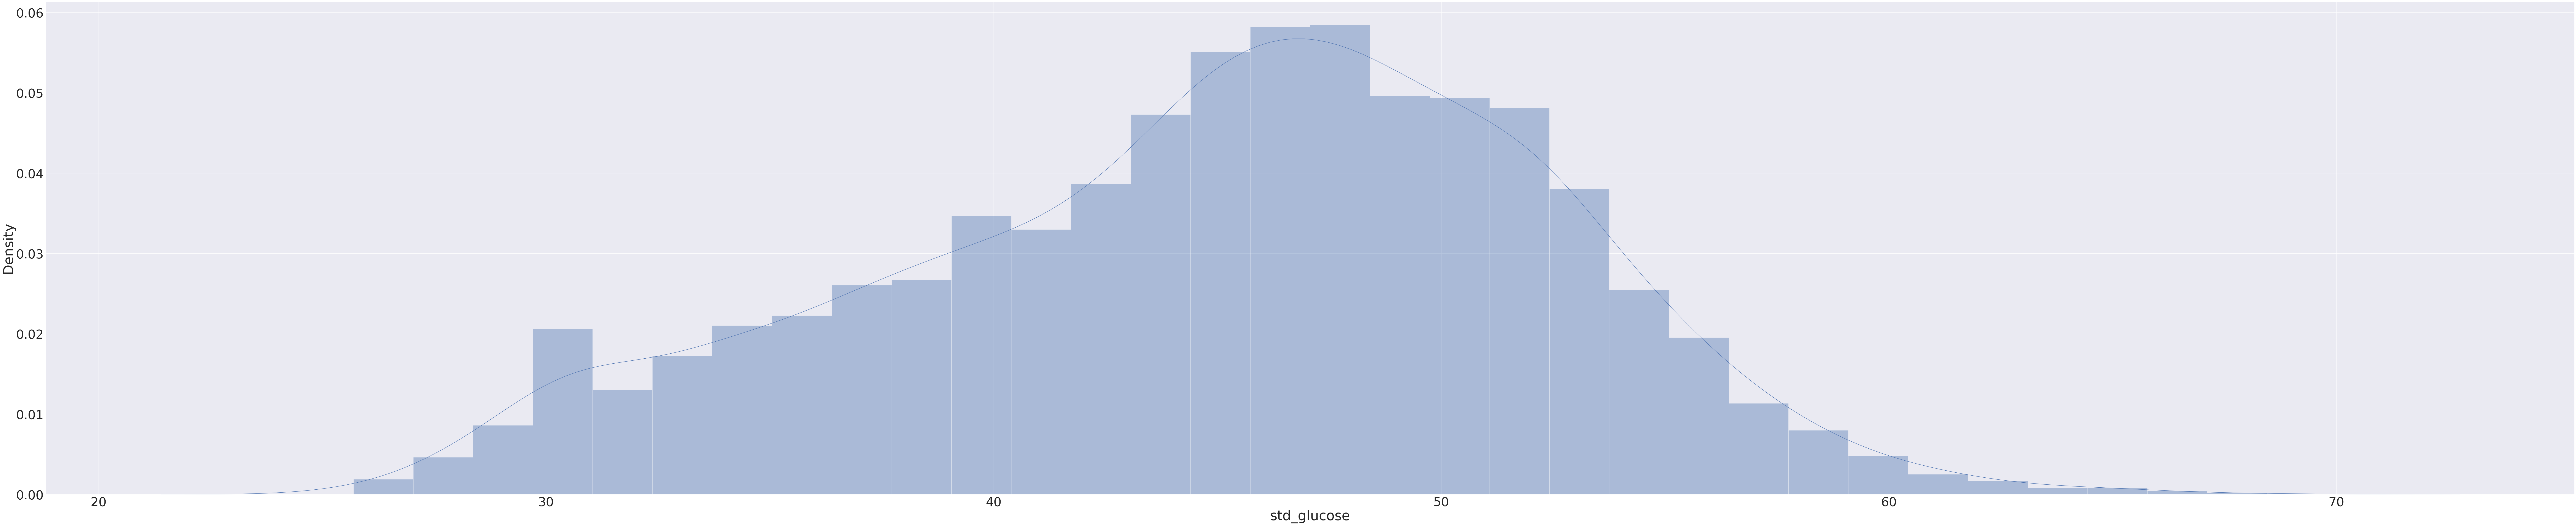

In [ ]:
df_normal_glucose_std=df_normal_glucose["std_glucose"]
df_normal_glucose_std=df_normal_glucose_std.dropna().reset_index(drop=True)
df_normal_glucose_std
sns.distplot(df_normal_glucose_std)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


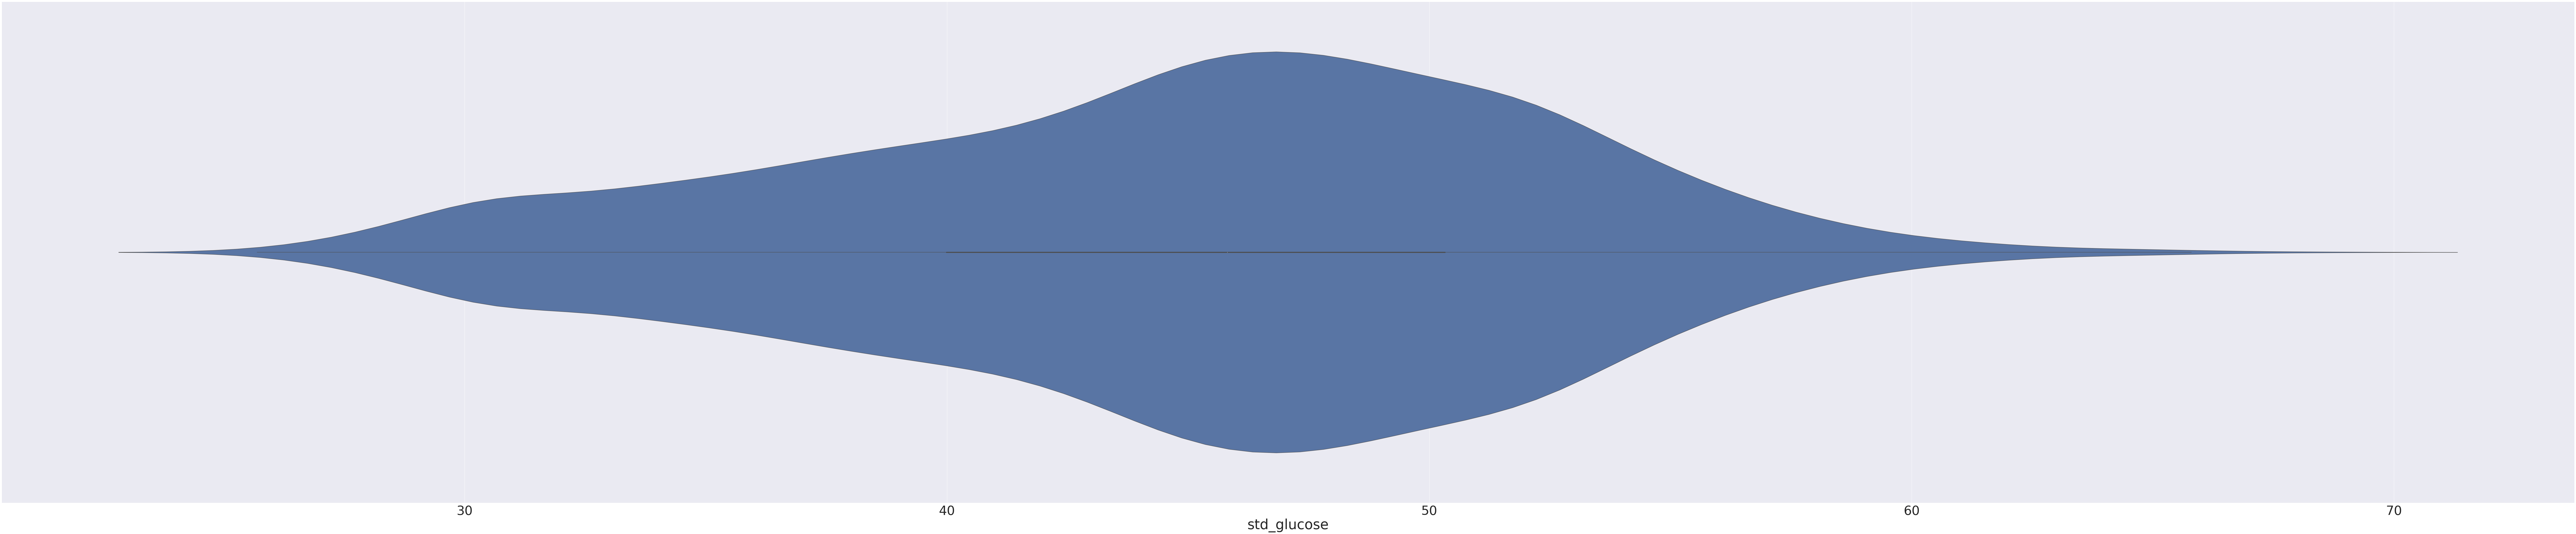

In [ ]:
ax = sns.violinplot('std_glucose', data=df_normal_glucose)

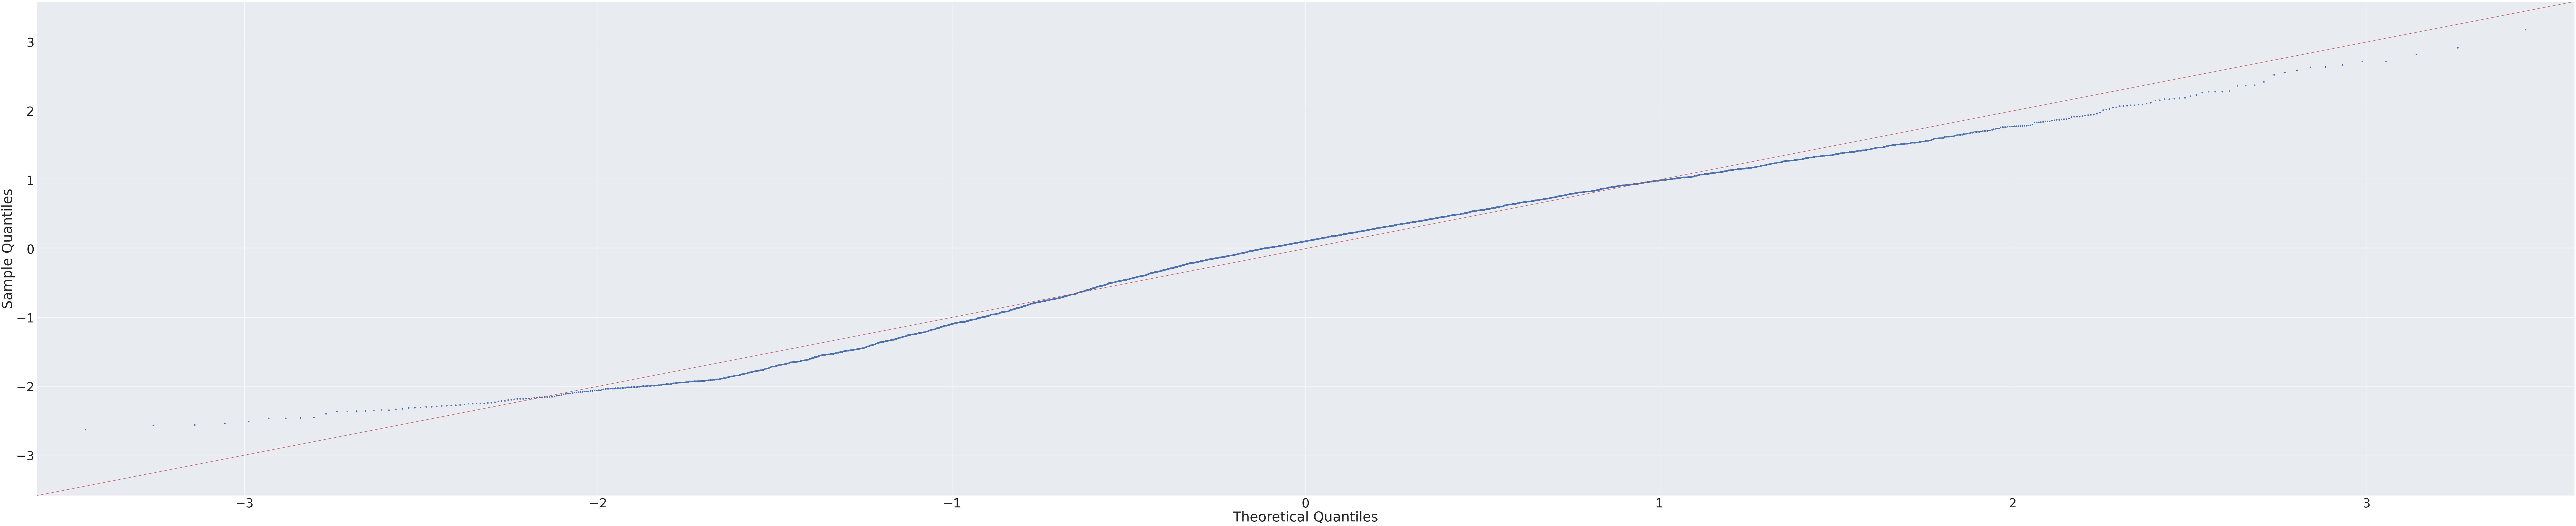

In [ ]:

_ = sm.ProbPlot(df_normal_glucose_std, fit=True).qqplot(line='45')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


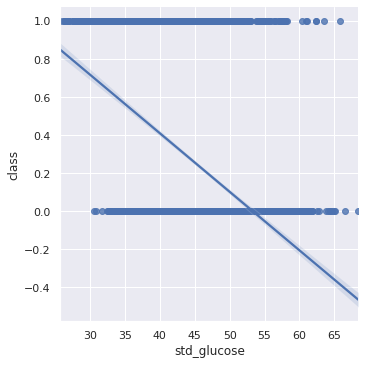

In [ ]:
sns.set(font_scale=1) 
sns.lmplot("std_glucose", "class", df_normal_glucose)

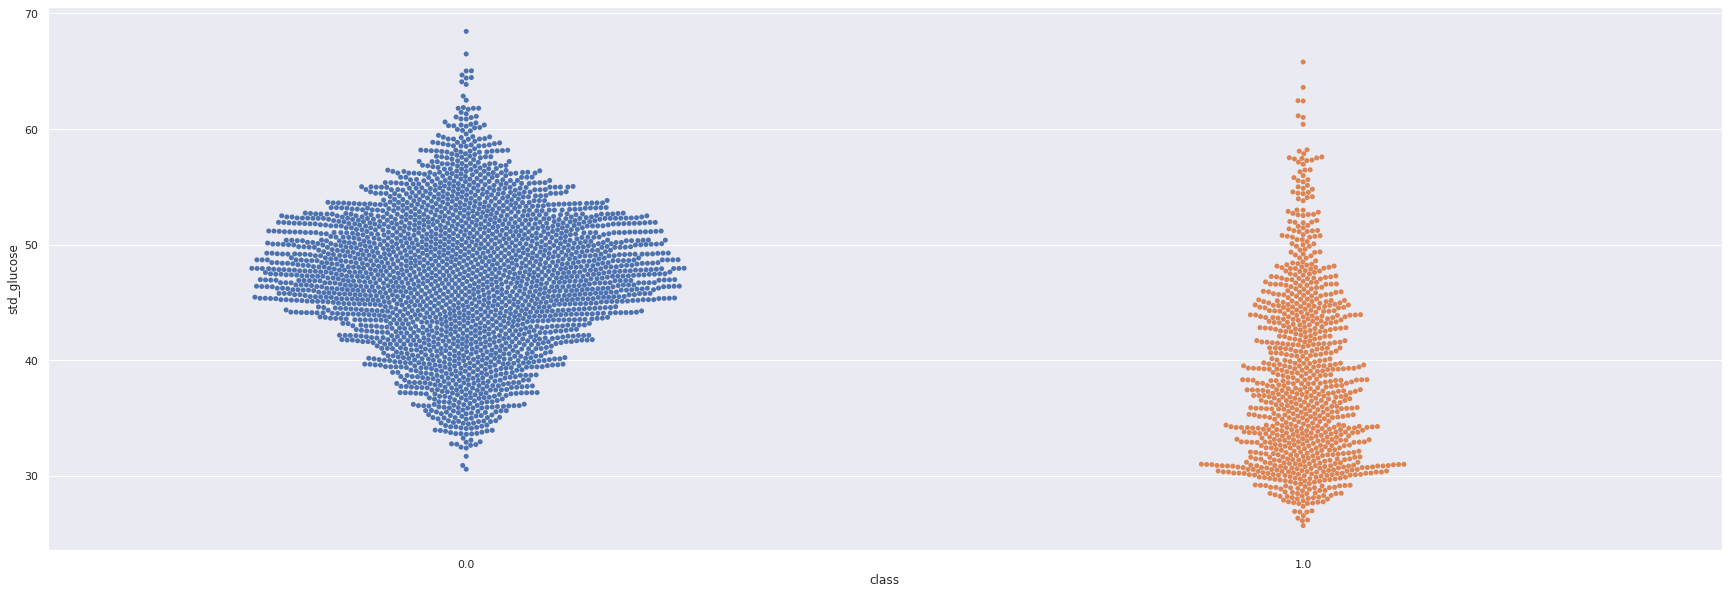

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)
swarm = sns.swarmplot(x="class", y="std_glucose", data=df_normal_glucose)
sns.set(font_scale=0.5) 

####As we can see the value of "std_glucose" affects presence of the disease. At the plot we can see that the disease is present mainly when the value of oxygen is within interval (0, 45). Now we are going to check the hypothesis with a statistical test.

####So our H0 is that std_glucose doesn't affect class value. And the alternative one is that it has impact on presence of the diabetes.

In [ ]:
test_glucose = df_normal_glucose[["std_glucose", "class"]].dropna().reset_index(drop=True)
test_glucose[["std_glucose", "class"]].corr()

std_glucose     class
std_glucose     1.000000 -0.519858
class          -0.519858  1.000000

In [ ]:
stats.shapiro(df_train[(df_train["class"]==0)].std_glucose.dropna().reset_index(drop=True))

(0.44076383113861084, 0.0)

In [ ]:
stats.shapiro(df_train[(df_train["class"]==1)].std_glucose.dropna().reset_index(drop=True))

(0.44129669666290283, 0.0)

In [ ]:
stats.mannwhitneyu(df_train[(df_train["class"]==0)].std_glucose, df_train[(df_train["class"]==1)].std_glucose)

MannwhitneyuResult(statistic=736991.0, pvalue=5.395166501210963e-128)

#### As we can see all three p-values are less than 0.0001 and that means the alternative hypothesis is true.

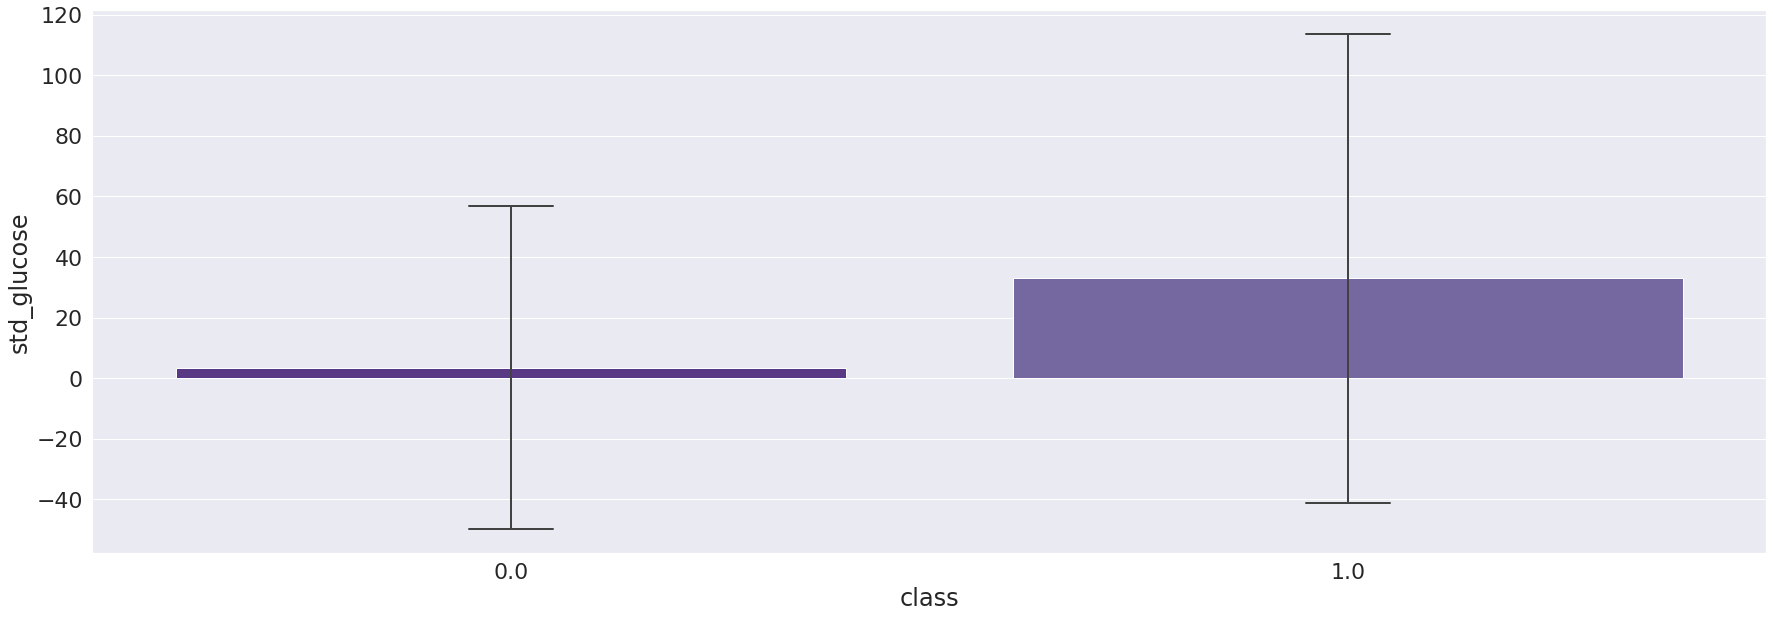

In [ ]:
sns.set(font_scale=2)
sns.barplot(x='class', y='std_glucose', data=df_train,capsize=0.1, errwidth=2, palette=sns.color_palette("Purples_r"))

In [ ]:
sms.DescrStatsW(df_normal_glucose_std).tconfint_mean()

(44.77755584087991, 45.2614289128111)

###Analyse further

In [ ]:
stats.shapiro(df_train[(df_train["class"]==1)].kurtosis_glucose.dropna().reset_index(drop=True))

(0.9629759192466736, 2.5833283046229746e-15)

In [ ]:
stats.shapiro(df_train[(df_train["class"]==0)].std_glucose.dropna().reset_index(drop=True))

(0.44076383113861084, 0.0)

In [1]:
test_oxygen_mean[["kurtosis_glucose", "class"]].corr()

NameError: ignored

#Problems

###We have identified many problems.
1. One of them - the duplicates - was described earlier in this notebook. 

In [ ]:
df_train =pd.merge(df_train_personal, df_train_other, on=["name", "address"])
df_train[df_train["name"].isin(non_unique_2["name"])].sort_values("name")

*Solution*: "merge" these duplicates into one using all valid data of rows.

2. The second problem is that some data have not appropriate type. For example "mean_glucose" has to be float type and date of birth has to be a date type, but:

In [ ]:
type(df_train_personal.date_of_birth[0])

In [ ]:
type(df_train_other.mean_glucose[0])

*Solution*: change data types


3. Some data is incosistent:

In [ ]:
non_unique=(df_train_other['pregnant'].value_counts()).to_dict()
non_unique

*Solution*: change to 2 types of values - 't' and 'f'.

In [ ]:
df_train_personal.date_of_birth[0:3]

*Solution*: change to 1 type.

4. Also a presence of non-defined values can cause problems:

In [ ]:
df_train.isnull().sum()

In [ ]:
#Shows how many records has at least one missing value
df_train.isnull().any(axis=1).sum()
# df_train[df_train.isnull().any(axis=1)]

In [ ]:
#Shows how many missing values is there in total 
df_train.isnull().sum().sum()

*Solution*: don't count with the null data

5. Some data are not valid as age:

In [ ]:
df_train_personal[df_train_personal['age']==-1]

*Solution*: change the age to actual one.

Also as it turns out, this person is pregnant according to dataset which is not possible too.

In [ ]:
df_train[df_train['age']==-1]

6. Values in column "pregnant" for men sometimes are 'true', which can't be right.

In [ ]:
df_train[df_train["sex"]==' Male'][df_train["pregnant"]=="t"]

*Solution*: change it to 'f'.

7. Value in column "sex" starts with space:

In [ ]:
#We will have to erase space before value
df_train_personal.sex.unique()

*Solution*: change values to 'Male' and 'Female' without space.